In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

In [28]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [29]:
production_ice_cream = pd.read_csv('ice_cream.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [30]:
production_ice_cream.rename('production', inplace = True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: production, Length: 577, dtype: float64

In [31]:
production_ice_cream = production_ice_cream.asfreq(pd.infer_freq(production_ice_cream.index))

In [32]:
start_date = pd.to_datetime('2010-01-01')
production_ice_cream=production_ice_cream[start_date:]

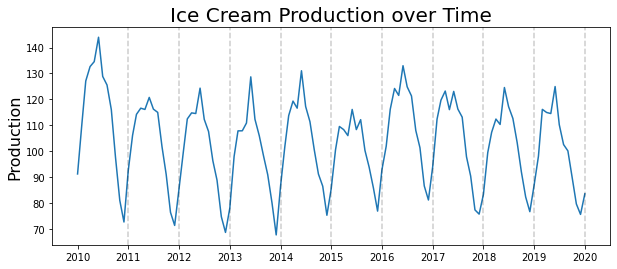

In [33]:
plt.figure(figsize=(10,4))
plt.plot(production_ice_cream)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

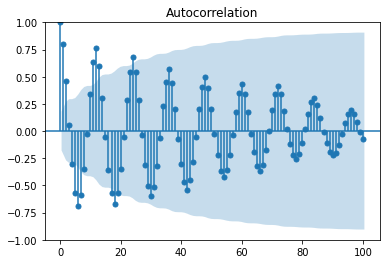

In [34]:
acf_plot = plot_acf(production_ice_cream,lags = 100)

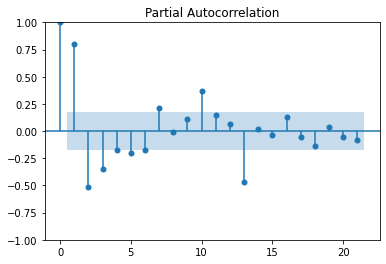

In [35]:
pacf_plot = plot_pacf(production_ice_cream, method='ywm')

In [36]:
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)

train_data = production_ice_cream[:train_end]
test_data = production_ice_cream[train_end + timedelta(days=1):test_end]
test_data

DATE
2019-01-01     86.9988
2019-02-01     98.1116
2019-03-01    116.1718
2019-04-01    114.9703
2019-05-01    114.5613
2019-06-01    124.9605
2019-07-01    110.2632
2019-08-01    102.6085
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
Freq: MS, Name: production, dtype: float64

In [37]:
test_data,

(DATE
 2019-01-01     86.9988
 2019-02-01     98.1116
 2019-03-01    116.1718
 2019-04-01    114.9703
 2019-05-01    114.5613
 2019-06-01    124.9605
 2019-07-01    110.2632
 2019-08-01    102.6085
 2019-09-01    100.1741
 2019-10-01     90.1684
 2019-11-01     79.7223
 2019-12-01     75.7094
 Freq: MS, Name: production, dtype: float64,)

In [38]:
train_end

datetime.datetime(2018, 12, 1, 0, 0)

In [39]:
train_data

DATE
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
                ...   
2018-08-01    112.6779
2018-09-01    103.3118
2018-10-01     92.1321
2018-11-01     82.4347
2018-12-01     76.7608
Freq: MS, Name: production, Length: 108, dtype: float64

In [40]:
import statsmodels.api as sm
model=ARIMA(train_data,order=(3,0,0))
results=model.fit()

In [41]:
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:',end - start)

Model Fitting Time: 0.10910344123840332


In [42]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Fri, 26 Nov 2021   AIC                            758.170
Time:                        20:56:53   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.7

In [45]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [46]:
predictions = model_fit.predict(start=pred_start_date,end = pred_end_date)
residuals = test_data - predictions

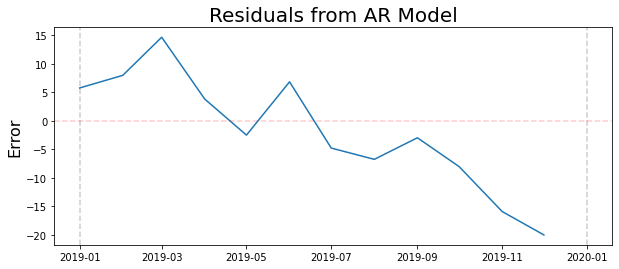

In [47]:
plt.figure(figsize =(10,4))
plt.plot(residuals)
plt.title("Residuals from AR Model",fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color ="r",linestyle="--",alpha=0.2)
for year in range (2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle="--",alpha=0.2)

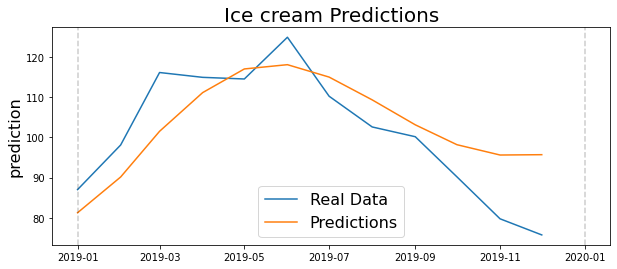

In [48]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Real Data', 'Predictions'), fontsize=16)

plt.title('Ice cream Predictions', fontsize=20)
plt.ylabel('prediction', fontsize=16)
for year in range (2019,2021):
     plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle="--",alpha=0.2)